## Number plate detection


In [1]:
import cv2
import numpy as np

frameWidth = 640    #Frame Width
franeHeight = 480   # Frame Height

plateCascade = cv2.CascadeClassifier("haarcascade_russian_plate_number.xml")
minArea = 500

camIndex = 'http://192.168.0.100:8080/video'
cap =cv2.VideoCapture(camIndex)
cap.set(3,frameWidth)
cap.set(4,franeHeight)
cap.set(10,150)
count = 0

while True:
    success , img  = cap.read()

    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    numberPlates = plateCascade .detectMultiScale(imgGray, 1.1, 4)

    for (x, y, w, h) in numberPlates:
        area = w*h
        if area > minArea:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(img,"NumberPlate",(x,y-5),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
            imgRoi = img[y:y+h,x:x+w]
            cv2.imshow("ROI",imgRoi)
    cv2.imshow("Result",img)
    if cv2.waitKey(1) & 0xFF ==ord('s'):
        cv2.imwrite("G:/Summer Program/Tasks/RTO/Images/"+str(count)+".jpg",imgRoi)
        cv2.rectangle(img,(0,200),(640,300),(0,255,0),cv2.FILLED)
        cv2.putText(img,"Scan Saved",(15,265),cv2.FONT_HERSHEY_COMPLEX,2,(0,0,255),2)
        cv2.imshow("Result",img)
        cv2.waitKey(500)
        count+=1
        cv2.destroyAllWindows()
        break

## Extracting number from image

In [2]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
print(cv2.__version__)

4.5.2


In [4]:
images_dir = "./Images"
image_files = os.listdir(images_dir)

In [5]:
image_path = "{}/{}".format(images_dir,"0.jpg")

In [6]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [7]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)


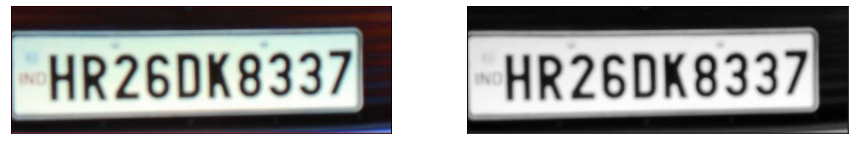

In [8]:
plot_images(image, gray)

In [9]:
blur  = cv2.bilateralFilter(gray, 1,90,90)

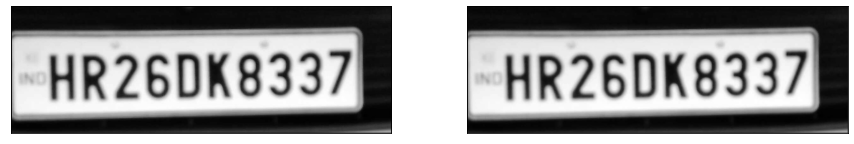

In [10]:
plot_images(gray, blur)

In [11]:
edges = cv2.Canny(blur, 30, 200)

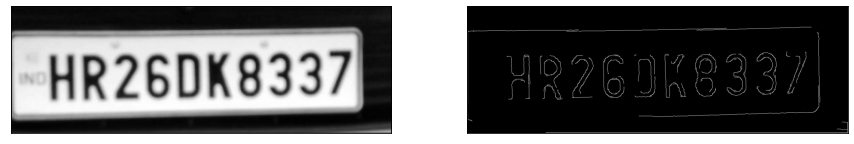

In [12]:
plot_images(blur,edges)

In [13]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [14]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

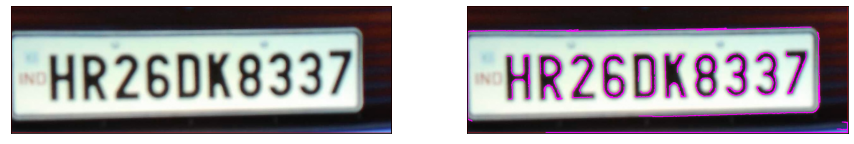

In [15]:
plot_images(image, image_copy)

In [16]:
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:30]

In [17]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

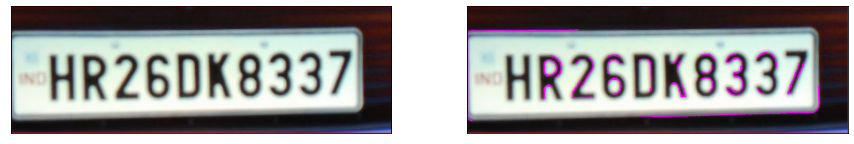

In [18]:
plot_images(image, image_copy)

In [19]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

In [20]:

image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

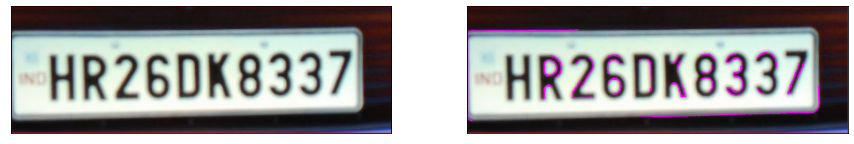

In [21]:
plot_images(image, image_copy)

In [34]:
import pytesseract
text = pytesseract.image_to_string(imgRoi, lang="eng")

In [35]:
print(text)

HR26DK8337l




## Getting using detail using RTO API

In [24]:
import requests
import xmltodict
import json

In [51]:
def get_vechicle_info():
    r = requests.get("https://www.regcheck.org.uk/api/reg.asmx/CheckIndia?RegistrationNumber={}&username=xyz".format(str(text)))
    data = xmltodict.parse(r.content) ## converting xml to dictionary
    jdata = json.dumps(data) ### converting dictionary to json
    df = json.loads(jdata)
    df1 = json.loads(df['Vehicle']['vehicleJson'])
    return df1

In [52]:
get_vechicle_info()

{'Description': 'MARUTI SUZUKI INDIA LTD / SWIFT ZXI ',
 'RegistrationYear': '2018',
 'CarMake': {'CurrentTextValue': 'MARUTI SUZUKI INDIA LTD'},
 'CarModel': {'CurrentTextValue': 'SWIFT ZXI'},
 'MakeDescription': {'CurrentTextValue': 'MARUTI SUZUKI INDIA LTD'},
 'ModelDescription': {'CurrentTextValue': 'SWIFT ZXI'},
 'VechileIdentificationNumber': 'MBHCZC63SHL10000',
 'EngineNumber': 'K12MN20XXXXX',
 'FuelType': {'CurrentTextValue': 'PETROL'},
 'RegistrationDate': '03/01/2018',
 'Owner': 'MARUTI SUZUKI INDIA LIMITED',
 'Fitness': '02-Jan-2033',
 'Insurance': '03-Dec-2018',
 'Location': 'RLA, GURGAON',
 'ImageUrl': 'http://in.carregistrationapi.com/image.aspx/@TUFSVVRJIFNVWlVLSSBJTkRJQSBMVEQgLyBTV0lGVCBaWEkg'}